In [1]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', '..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.evaluation.metrics import calculate_all_metrics

Quick check that working directory and train basin file exists:

In [3]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("calpella"))

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all
Train Basin File Exists: True


Run regular LSTM:

In [5]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/11082024_data_streamflow_met_Russian_River_share_UCB/")
path_to_yaml = Path("calpella_gage.yaml")
params = {
    "epochs":32,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [6]:
lstmNoPhysics.train(period='test')

2024-12-20 12:03:38,647: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2012_120338\output.log initialized.
2024-12-20 12:03:38,649: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2012_120338
2024-12-20 12:03:38,651: ### Run configurations for testing_run
2024-12-20 12:03:38,653: experiment_name: testing_run
2024-12-20 12:03:38,656: train_basin_file: calpella
2024-12-20 12:03:38,659: validation_basin_file: calpella
2024-12-20 12:03:38,660: test_basin_file: calpella
2024-12-20 12:03:38,662: train_start_date: 1994-10-01 00:00:00
2024-12-20 12:03:38,664: train_end_date: 2002-09-30 00:00:00
2024-12-20 12:03:38,665: validation_start_date: 2002-10-01 00:00:00
2024-12-20 12:03:38,668: validation_end_date: 2005-09-30 00:00:00
2024-12-20 12:03:38,670: test_start_date: 2005-10-01 00:00:00
2024-12-20 12:03:38,671: test_end_date: 2009-09-30 00:00:00
2024-12-20 12:03:38,673: device: cpu
2024-12-20 12:03:38,674:

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mo

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]
2024-12-20 12:04:24,848: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2012_120338\test\model_epoch032\test_metrics.csv
2024-12-20 12:04:24,851: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2012_120338\test\model_epoch032\test_results.p


Using basin: Calpella
Using target variable: NR CALPELLA FLOW COE CPL


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' ins

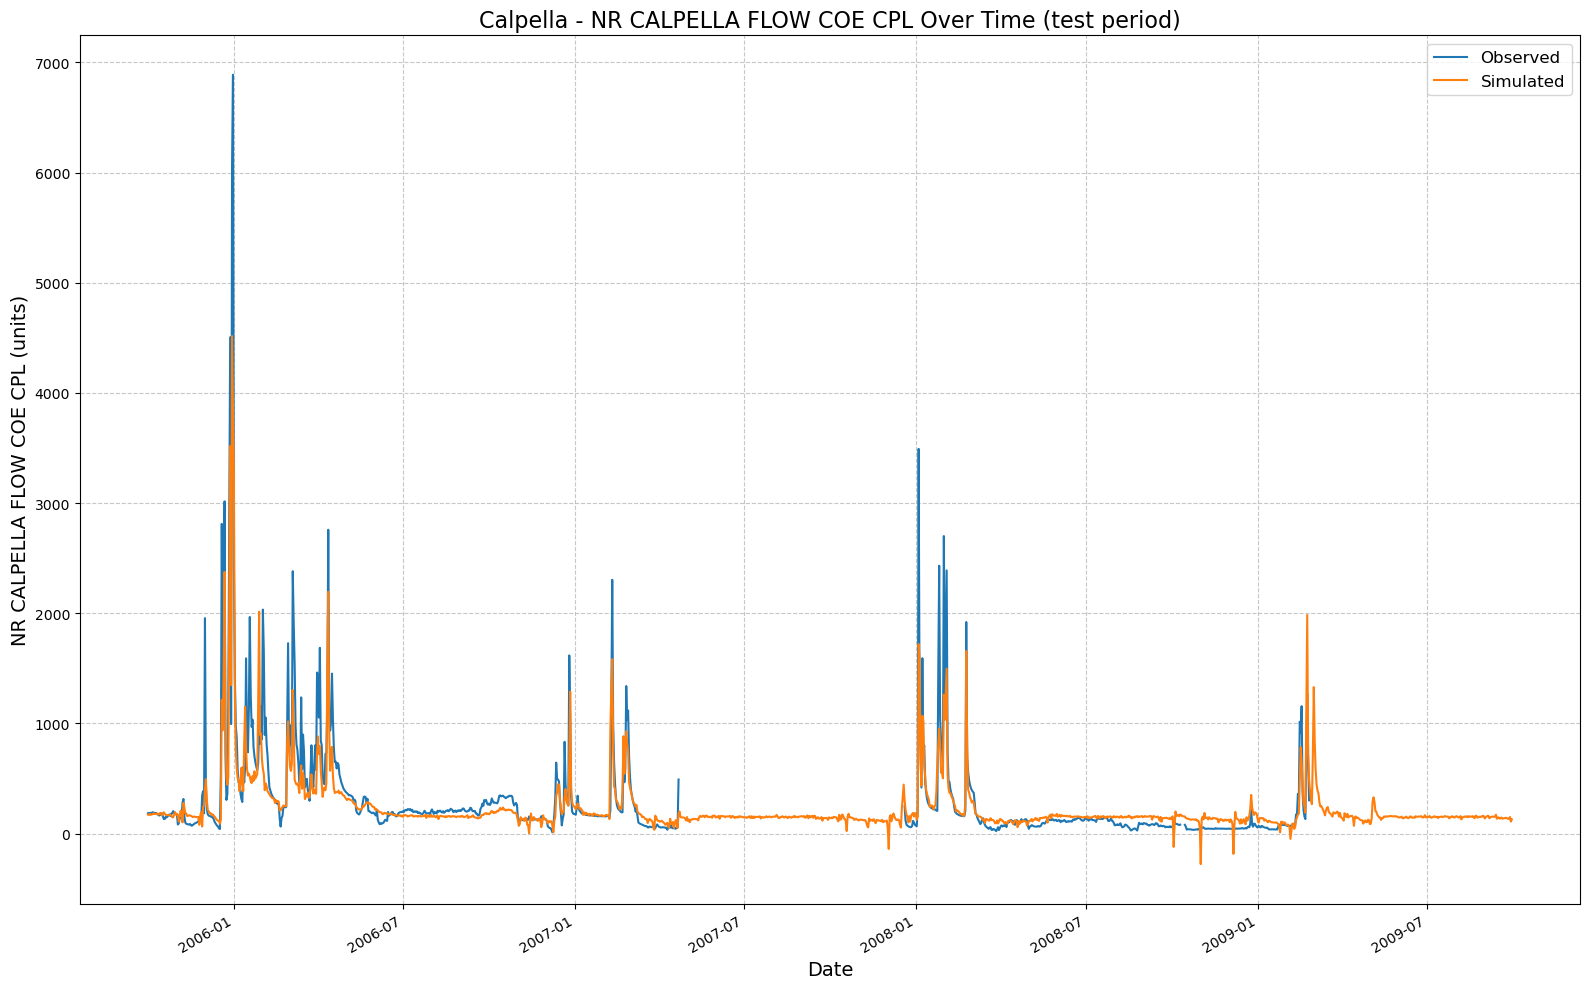

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2012_120338\results_output_test.csv


{'NSE': 0.770152285695076,
 'MSE': 58537.5546875,
 'RMSE': 241.9453547549529,
 'KGE': 0.6556034075452833,
 'Alpha-NSE': 0.6857200547221234,
 'Beta-KGE': 0.894005298614502,
 'Beta-NSE': -0.06226676412298775,
 'Pearson-r': 0.9072516729598092,
 'FHV': -28.246048092842102,
 'FMS': -44.39566069996179,
 'FLV': -1009.617928487199,
 'Peak-Timing': 0.5,
 'Peak-MAPE': 46.17410182952881}

In [7]:
lstmNoPhysics.results(period='test')

In [22]:
lstmNoPhysics.train(period='validation')

2024-12-20 12:06:47,681: Logging to F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2012_120338\testing_run_2012_120425\testing_run_2012_120518\testing_run_2012_120647\output.log initialized.
2024-12-20 12:06:47,685: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2012_120338\testing_run_2012_120425\testing_run_2012_120518\testing_run_2012_120647
2024-12-20 12:06:47,687: ### Run configurations for testing_run
2024-12-20 12:06:47,690: experiment_name: testing_run
2024-12-20 12:06:47,691: train_basin_file: calpella
2024-12-20 12:06:47,692: validation_basin_file: calpella
2024-12-20 12:06:47,693: test_basin_file: calpella
2024-12-20 12:06:47,697: train_start_date: 1994-10-01 00:00:00
2024-12-20 12:06:47,699: train_end_date: 2002-09-30 00:00:00
2024-12-20 12:06:47,699: validation_start_date: 2002-10-01 00:00:00
2024-12-20 12:06:47,700: validation_end_date: 2005-09-30 00:00:00
2024-12-20 12:06:47,702: test_start_dat

F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.mo

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]
2024-12-20 12:07:27,446: Stored metrics at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2012_120338\testing_run_2012_120425\testing_run_2012_120518\testing_run_2012_120647\validation\model_epoch032\validation_metrics.csv
2024-12-20 12:07:27,448: Stored results at F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2012_120338\testing_run_2012_120425\testing_run_2012_120518\testing_run_2012_120647\validation\model_epoch032\validation_results.p


Using basin: Calpella
Using target variable: NR CALPELLA FLOW COE CPL


F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' ins

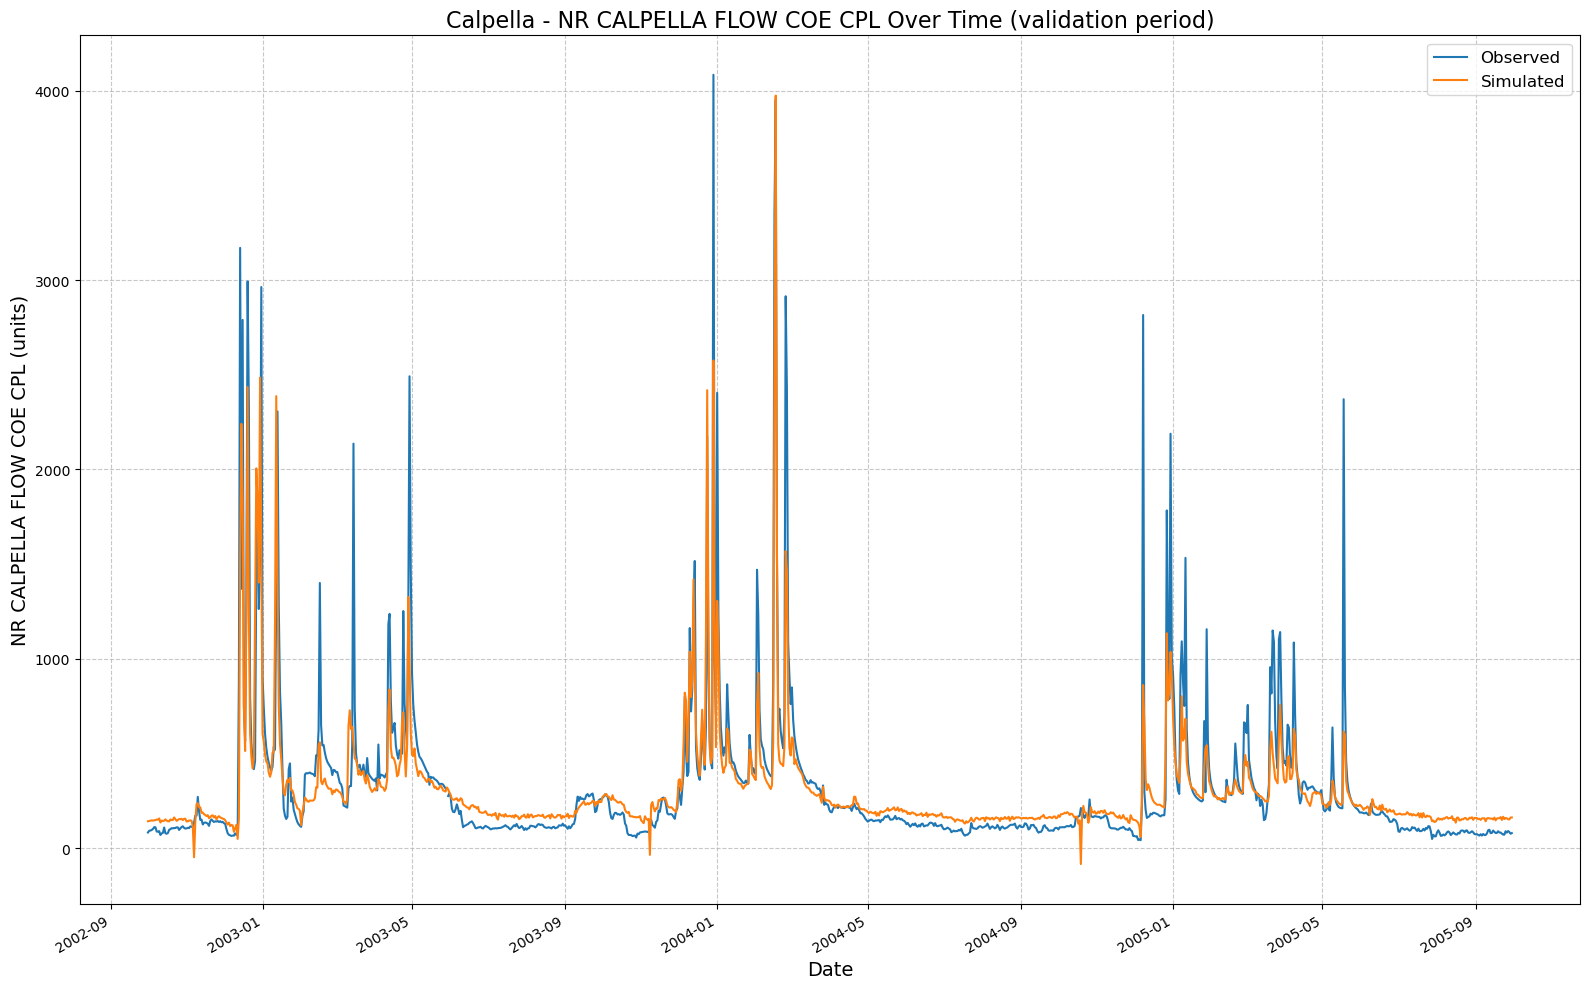

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_2012_120338\testing_run_2012_120425\testing_run_2012_120518\testing_run_2012_120647\results_output_validation.csv


{'NSE': 0.7500607073307037,
 'MSE': 42817.66015625,
 'RMSE': 206.92428604745746,
 'KGE': 0.6938379110392108,
 'Alpha-NSE': 0.7198185750108939,
 'Beta-KGE': 0.9658643007278442,
 'Beta-NSE': -0.026115731240917137,
 'Pearson-r': 0.8813899336350026,
 'FHV': -24.632196128368378,
 'FMS': -41.10701003233117,
 'FLV': -2291.8872942670787,
 'Peak-Timing': 0.4,
 'Peak-MAPE': 58.481378555297844}

In [24]:
lstmNoPhysics.results(period='validation')

In [26]:
lstmNoPhysics.results(period='test')

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\Dino\\UCB-USACE-LSTMs\\neuralhydrology\\calpella_all\\runs\\testing_run_2012_120338\\testing_run_2012_120425\\testing_run_2012_120518\\testing_run_2012_120647\\test\\model_epoch032\\test_results.p'

Now run physics informed lstm with HMS data:

In [ ]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/11082024_data_streamflow_met_Russian_River_share_UCB")
path_to_yaml = Path("calpella_gage.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/HMS_outputs_for_UCB/Calpella_daily.csv")
params = {
    "epochs":32,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from daily
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "POTTER VALLEY CA FLOW USGS_ADJUSTED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    #from new capella.csv
    'Capella Gage FLOW',
    'EF Russian 20 ET-POTENTIAL',
    'EF Russian 20 FLOW',
    'EF Russian 20 FLOW-BASE',
    'EF Russian 20 INFILTRATION',
    'EF Russian 20 PERC-SOIL',
    'EF Russian 20 SATURATION FRACTION',
#    'Lake Mendocino Storage',
]
lstmPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data)

In [ ]:
lstmPhysics.train(period='test')

In [ ]:
lstmPhysics.results(period='test')

In [ ]:
lstmPhysics.train(period='validation')

In [ ]:
lstmPhysics.results(period='validation')

In [ ]:
lstmPhysics.results(period='test')

Re-run physics informed lstm with Lake Mendocino:

In [ ]:
path_to_csv = Path("F:/Dino/UCB-USACE-LSTMs/data/11082024_data_streamflow_met_Russian_River_share_UCB")
path_to_yaml = Path("calpella_gage.yaml")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/HMS_outputs_for_UCB/Calpella_daily.csv")

params = {
    "epochs":32,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}

features_with_physics = [
    #from daily
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "POTTER VALLEY CA FLOW USGS_ADJUSTED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    #from new capella.csv
    'Capella Gage FLOW',
    'EF Russian 20 ET-POTENTIAL',
    'EF Russian 20 FLOW',
    'EF Russian 20 FLOW-BASE',
    'EF Russian 20 INFILTRATION',
    'EF Russian 20 PERC-SOIL',
    'EF Russian 20 SATURATION FRACTION',
    'Lake Mendocino Storage',
]
lstmPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data)

In [ ]:
lstmPhysics.train(period='validation')

In [ ]:
lstmPhysics.results(period='validation')

In [ ]:
lstmPhysics.results(period='test')

Now, combine the results for the normal lstm, physics informed lstm and the hms results on one graph over a specified time period (the test period).

In [ ]:
import xarray as xr

In [ ]:
def combinedPlot(lstm_results: Path, lstmPhysics_results: Path, HMS_results: Path, title: str, 
                 test_start_date="01/10/2005", test_end_date="30/09/2009"):
    model1_df = pd.read_csv(lstm_results) #colums: Date, Observed, Predicted
    model2_df = pd.read_csv(lstmPhysics_results) #colums: Date, Observed, Predicted
    model1_df = model1_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model1',
        'Predicted': 'Predicted_Model1'
    })
    model1_df['date'] = pd.to_datetime(model1_df['date'])

    # Set all negative values in the Predicted_Model1 column to zero
    model1_df.loc[model1_df['Predicted_Model1'] < 0, 'Predicted_Model1'] = 0

    model2_df = model2_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model2',
        'Predicted': 'Predicted_Model2'
    })
    model2_df['date'] = pd.to_datetime(model2_df['date'])

    # Set all negative values in the Predicted_Model2 column to zero
    model2_df.loc[model2_df['Predicted_Model2'] < 0, 'Predicted_Model2'] = 0
    
    #This just gets the HMS prediceted values from the physics csv
    hms_df = pd.read_csv(HMS_results)
    hms_df = hms_df[3:]
    hms_df.columns = hms_df.columns.str.strip()
    hms_df = hms_df.drop(columns=['Ordinate'])
    hms_df = hms_df.rename(columns={'Date / Time': 'date'})
    hms_df['date'] = pd.to_datetime(hms_df['date'], format='%d-%b-%y')
    hms_df = hms_df.reset_index(drop=True)
    hms_df = hms_df.iloc[:, [0,1]] #Date, HMS predicted
    hms_df = hms_df.rename(columns={hms_df.columns[1]: "HMS_predicted"})
    hms_df["HMS_predicted"] = pd.to_numeric(hms_df["HMS_predicted"], errors="coerce")

    df = model1_df.merge(model2_df, how='right', on='date').merge(hms_df, how='right', on='date')

    # Filter for the test period
    test_start_date = pd.to_datetime("2005-10-01")
    test_end_date = pd.to_datetime("2009-09-30")
    df = df[(df['date'] >= test_start_date) & (df['date'] <= test_end_date)]

    # Convert pandas Series to xarray DataArray with a datetime coordinate
    obs_da = xr.DataArray(df['Observed_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_hms = xr.DataArray(df['HMS_predicted'].values, dims=["date"], coords={"date": df['date']})
    sim_da_lstm = xr.DataArray(df['Predicted_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_physics = xr.DataArray(df['Predicted_Model2'].values, dims=["date"], coords={"date": df['date']})

    # Collect metrics into a dictionary
    metrics = {
        "HMS": calculate_all_metrics(obs_da, sim_da_hms),
        "LSTM": calculate_all_metrics(obs_da, sim_da_lstm),
        "Physics_Informed_LSTM": calculate_all_metrics(obs_da, sim_da_physics),
    }

    metrics_df = pd.DataFrame(metrics)
    output_csv_path = "calpella_metrics.csv"
    metrics_df.to_csv(output_csv_path)

    # Plot all columns against the "date_col" (x-axis)
    plt.figure(figsize=(30, 10))
    
    plt.plot(df["date"], df["Observed_Model1"], label='Observed', linewidth=2)
    plt.plot(df["date"], df["HMS_predicted"], label='HMS Prediction',  linewidth=2, alpha=0.7)
    plt.plot(df["date"], df["Predicted_Model1"], label='LSTM Prediction', linewidth=2, alpha=0.8)
    plt.plot(df["date"], df["Predicted_Model2"], label='Physics Informed LSTM Prediction', linewidth=2, alpha=0.7)
    
    # Customize the plot
    plt.tick_params(axis='x', labelsize=15)  # For x-axis tick labels
    plt.tick_params(axis='y', labelsize=15) 
    plt.xlabel("Date", fontsize=20)
    plt.ylabel("Inflow (cubic feet per second)", fontsize=20)
    plt.title(title, fontsize=30)
    plt.legend(fontsize=25, loc="upper right")
    plt.grid(True, alpha=0.4)

    plt.xlim(test_start_date, test_end_date)

    #plt.gcf.autofmt_xdate()
    plt.tight_layout()
    plt.show()

    return plt

In [ ]:
#change the paths to the respective ouptut csvs from running the result method
lstm_result_path = Path("F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_1212_160120/results_output.csv")
physics_informed_result_path = Path("F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_1212_162509/results_output.csv")
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/HMS_outputs_for_UCB/Calpella_daily.csv")
myplot = combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Guerneville Basin Model Comparison')

Old notebook: Comparison to results from physicsLSTM : The following cells test the physics informed for the validation period, the way evan did in the testing_notebook

In [ ]:
run_dir = Path('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_3011_134216')
eval_run(run_dir=run_dir, period="test")

In [ ]:
with open(run_dir / "test" / "model_epoch032" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)
    
results['Calpella']['1D']['xr']

In [ ]:

# extract observations and LSTM simulations
qobs = results['Calpella']['1D']['xr']['NR CALPELLA FLOW COE CPL_obs']
qsim = results['Calpella']['1D']['xr']['NR CALPELLA FLOW COE CPL_sim']

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs["date"], qobs, label="Obs")
ax.plot(qsim["date"], qsim, label="Sim")
ax.set_ylabel("NR Calpella Flow")
ax.legend()
ax.set_title(f"Calpella Gage Validation period - NSE {results['Calpella']['1D']['NSE']:.3f}")

The following function combines the the results for the normal lstm, physics informed lstm and the hms results on one graph over a specified time period. (Also computes NSE for HMS model and recomputes NSE for LSTMS including setting all negative values to 0.)

In [ ]:
import xarray as xr

In [ ]:
def combinedPlot(lstm_results: Path, lstmPhysics_results: Path, HMS_results: Path, title: str, 
                 test_start_date="01/10/2005", test_end_date="30/09/2009"):
    model1_df = pd.read_csv(lstm_results) #colums: Date, Observed, Predicted
    model2_df = pd.read_csv(lstmPhysics_results) #colums: Date, Observed, Predicted
    model1_df = model1_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model1',
        'Predicted': 'Predicted_Model1'
    })
    model1_df['date'] = pd.to_datetime(model1_df['date'])

    # Set all negative values in the Predicted_Model1 column to zero
    model1_df.loc[model1_df['Predicted_Model1'] < 0, 'Predicted_Model1'] = 0

    model2_df = model2_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model2',
        'Predicted': 'Predicted_Model2'
    })
    model2_df['date'] = pd.to_datetime(model2_df['date'])

    # Set all negative values in the Predicted_Model2 column to zero
    model2_df.loc[model2_df['Predicted_Model2'] < 0, 'Predicted_Model2'] = 0
    
    #This just gets the HMS prediceted values from the capella.csv thy gave us
    hms_df = pd.read_csv(HMS_results)
    hms_df = hms_df[2:]
    hms_df.columns = hms_df.columns.str.strip()
    hms_df = hms_df.drop(columns=['Ordinate'])
    hms_df = hms_df.rename(columns={'Date / Time': 'date'})
    hms_df['date'] = pd.to_datetime(hms_df['date'], format='%d-%b-%y')
    hms_df = hms_df.reset_index(drop=True)
    hms_df = hms_df.iloc[:, [0,1]] #Date, HMS predicted
    hms_df = hms_df.rename(columns={hms_df.columns[1]: "HMS_predicted"})
    hms_df["HMS_predicted"] = pd.to_numeric(hms_df["HMS_predicted"], errors="coerce")

    df = model1_df.merge(model2_df, how='right', on='date').merge(hms_df, how='right', on='date')

    # Filter for the test period
    test_start_date = pd.to_datetime("2005-10-01")
    test_end_date = pd.to_datetime("2009-09-30")
    df = df[(df['date'] >= test_start_date) & (df['date'] <= test_end_date)]

    # # print nse for each model
    # print("The metrics for HMS is:", calculate_all_metrics(xr.DataArray(df['Observed_Model1'], dims=["time"]), xr.DataArray(df['HMS_predicted'], dims=["time"])))
    # print("The metrics for pure LSTM is:", calculate_all_metrics(df['Observed_Model1'], df['Predicted_Model1']))
    # print("The metrics for Physics Informed LSTM is:", calculate_all_metrics(df['Observed_Model2'], df['Predicted_Model2']))
    # Convert pandas Series to xarray DataArray with a datetime coordinate
    obs_da = xr.DataArray(df['Observed_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_hms = xr.DataArray(df['HMS_predicted'].values, dims=["date"], coords={"date": df['date']})
    sim_da_lstm = xr.DataArray(df['Predicted_Model1'].values, dims=["date"], coords={"date": df['date']})
    sim_da_physics = xr.DataArray(df['Predicted_Model2'].values, dims=["date"], coords={"date": df['date']})

    # Collect metrics into a dictionary
    metrics = {
        "HMS": calculate_all_metrics(obs_da, sim_da_hms),
        "LSTM": calculate_all_metrics(obs_da, sim_da_lstm),
        "Physics_Informed_LSTM": calculate_all_metrics(obs_da, sim_da_physics),
    }

    metrics_df = pd.DataFrame(metrics)
    output_csv_path = "calpella_metrics.csv"
    metrics_df.to_csv(output_csv_path)

    # Pass xarray DataArrays with coordinates to calculate_all_metrics
    print("The metrics for HMS is:", calculate_all_metrics(obs_da, sim_da_hms))
    print("The metrics for pure LSTM is:", calculate_all_metrics(obs_da, sim_da_lstm))
    print("The metrics for Physics Informed LSTM is:", calculate_all_metrics(obs_da, sim_da_physics))

    # Plot all columns against the "date_col" (x-axis)
    plt.figure(figsize=(30, 10))
    
    plt.plot(df["date"], df["Observed_Model1"], label='Observed', linewidth=2) #color="blue",
    plt.plot(df["date"], df["Predicted_Model1"], label='LSTM Prediction', linewidth=2, alpha=0.8) #color="purple",
    plt.plot(df["date"], df["Predicted_Model2"], label='Physics Informed LSTM Prediction', linewidth=2, alpha=0.7) #color="orange",
    plt.plot(df["date"], df["HMS_predicted"], label='HMS Prediction',  linewidth=2, alpha=0.7) #color="lightblue",

    # Customize the plot
    plt.tick_params(axis='x', labelsize=15)  # For x-axis tick labels
    plt.tick_params(axis='y', labelsize=15) 
    plt.xlabel("Date", fontsize=20)
    plt.ylabel("Inflow (cubic feet per second)", fontsize=20)
    plt.title(title, fontsize=30)
    plt.legend(fontsize=25, loc="upper right")
    plt.grid(True, alpha=0.4)

    plt.xlim(test_start_date, test_end_date)

    #plt.gcf.autofmt_xdate()
    plt.tight_layout()
    plt.show()

In [ ]:
lstm_result_path = Path('F:\Dino\UCB-USACE-LSTMs\neuralhydrology\calpella_all\runs\testing_run_1212_160120\results_output.csv')
physics_informed_result_path = Path('F:/Dino/UCB-USACE-LSTMs/neuralhydrology/calpella_all/runs/testing_run_1212_161102/results_output.csv')
path_to_physics_data = Path("F:/Dino/UCB-USACE-LSTMs/data/HMS_outputs_for_UCB/Calpella_daily.csv")
combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Calpella Model Comparison')

In [ ]:
import plotly.graph_objects as go

def combinedPlotFancy(lstm_results: Path, lstmPhysics_results: Path, HMS_results: Path, title: str, 
                 test_start_date="01/10/2005", test_end_date="30/09/2009"):
    # Load and preprocess Model 1 (LSTM)
    model1_df = pd.read_csv(lstm_results)  # Columns: Date, Observed, Predicted
    model1_df = model1_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model1',
        'Predicted': 'Predicted_Model1'
    })
    model1_df['date'] = pd.to_datetime(model1_df['date'])

    # Load and preprocess Model 2 (Physics-Informed LSTM)
    model2_df = pd.read_csv(lstmPhysics_results)  # Columns: Date, Observed, Predicted
    model2_df = model2_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model2',
        'Predicted': 'Predicted_Model2'
    })
    model2_df['date'] = pd.to_datetime(model2_df['date'])

    # Load and preprocess HMS results
    hms_df = pd.read_csv(HMS_results)
    hms_df = hms_df[2:]
    hms_df.columns = hms_df.columns.str.strip()
    hms_df = hms_df.drop(columns=['Ordinate'])
    hms_df = hms_df.rename(columns={'Date / Time': 'date'})
    hms_df['date'] = pd.to_datetime(hms_df['date'], format='%d-%b-%y')
    hms_df = hms_df.reset_index(drop=True)
    hms_df = hms_df.iloc[:, [0, 1]]  # Keep only Date and HMS_predicted columns
    hms_df = hms_df.rename(columns={hms_df.columns[1]: "HMS_predicted"})
    hms_df["HMS_predicted"] = pd.to_numeric(hms_df["HMS_predicted"], errors="coerce")

    # Merge dataframes
    df = model1_df.merge(model2_df, how='right', on='date').merge(hms_df, how='right', on='date')

    # Filter for the test period
    test_start_date = pd.to_datetime(test_start_date, format='%d/%m/%Y')
    test_end_date = pd.to_datetime(test_end_date, format='%d/%m/%Y')
    df = df[(df['date'] >= test_start_date) & (df['date'] <= test_end_date)]

    # Create Plotly figure
    fig = go.Figure()

    # Add traces for each model
    fig.add_trace(go.Scatter(x=df["date"], y=df["Observed_Model1"], mode='lines',
                             name='Observed', line=dict(width=1.5)))
    fig.add_trace(go.Scatter(x=df["date"], y=df["Predicted_Model1"], mode='lines',
                             name='LSTM Prediction', line=dict(width=1.5)))
    fig.add_trace(go.Scatter(x=df["date"], y=df["Predicted_Model2"], mode='lines',
                             name='Physics-Informed LSTM Prediction', line=dict(width=1.5)))
    fig.add_trace(go.Scatter(x=df["date"], y=df["HMS_predicted"], mode='lines',
                             name='HMS Prediction', line=dict(width=1.2)))

    # Customize layout
    fig.update_layout(
        title=title,
        xaxis_title="Date",
        yaxis_title="Inflow (cubic feet per second)",
        template="seaborn",
        hovermode="x unified",
        xaxis=dict(
            rangeslider=dict(visible=True),  # Add range slider for zooming
            rangeselector=dict(
                buttons=[
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ]
            )
        )
    )

    # Zoom label formatting based on zoom level
    fig.update_xaxes(
        tickformatstops=[
            dict(dtickrange=[None, 1000], value="%Y-%m-%d"),
            dict(dtickrange=[1000, 86400000], value="%b %d, %Y"),
            dict(dtickrange=[86400000, "M1"], value="%b %Y"),
            dict(dtickrange=["M1", None], value="%Y"),
        ]
    )

    # Show plot
    fig.show()


In [ ]:

combinedPlotFancy(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Calpella Basin Model Comparison')